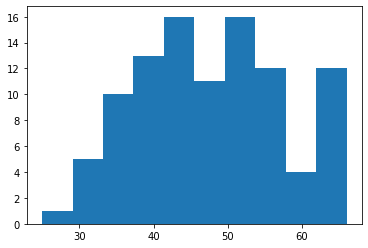

In [1]:
import numpy as np
import matplotlib.pyplot as plt

length = 100
user_num = 100

index = np.arange(length)
data = np.zeros((length, user_num), dtype=int)

# A = np.random.normal(50, 0.0001, user_num)
# omega = (2 * np.pi) / (np.random.normal(0.5, 0.0001, user_num) * length)
# phi = np.random.normal(0, 0.0001, user_num) * length
# b = np.random.normal(50, 0.0001, user_num)
# for i in range(user_num):
#     data[:, i] = np.round(np.clip(A[i]*np.sin(omega[i]*index + phi[i]) + b[i], 0, 99)).astype(int)
for i in range(length):
    data[i] = np.clip(np.round(np.random.normal(np.random.rand()*100, 10, user_num)), 0, 99).astype(int)

plt.hist(data[0])
plt.show()

In [319]:
data[0]

array([38, 48, 58, ..., 64, 66, 42])

In [389]:
from xxhash import xxh32

d = 100

dist_mat = np.zeros((d, d))
for i in range(d):
    for j in range(d):
        dist_mat[i][j] = abs(i - j)

def EM(data, d, alpha):
    dist = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            dist[i][j] = abs(i - j)
    p_mat = np.exp(-alpha*dist/2)
    for i, _ in enumerate(p_mat):
        p_mat[i] /= p_mat[i].sum()
    universe = np.arange(d)
    aggregated_data = np.zeros(d)
    for item in data:
        aggregated_data[np.random.choice(universe, p=p_mat[item])] += 1
    return aggregated_data

def OUE(data, d, epsilon):
    p = 1 - 1/2
    q = 1/(np.exp(epsilon)+1)
    aggregated_data = np.zeros(d)
    for i in range(len(data)):
        private_data = np.zeros(d)
        private_data[data[i]] = 1
        aggregated_data += np.where(private_data == 1, 
            np.random.binomial(1, p, d), 
            np.random.binomial(1, q, d))
    return (aggregated_data - len(data)*q)/(p - q)

def OLH(data, epsilon):
    global d
    g = int(round(np.exp(epsilon))) + 1
    p = np.exp(epsilon)/(np.exp(epsilon) + g - 1)
    q = 1/(np.exp(epsilon) + g - 1)
    aggregated_data = np.zeros(d)
    for i, item in enumerate(data):
        private_data = (xxh32(str(item), seed=i).intdigest() % g)
        if np.random.random_sample() > p - q:
            private_data = np.random.randint(0, g)
        for j in range(d):
            if private_data == (xxh32(str(j), seed=i).intdigest() % g):
                aggregated_data[j] +=  1
    return (g*aggregated_data - len(data))/(p*g - 1)

def RMSE(freq, est_freq):
    return np.sqrt((np.square(freq - est_freq)).mean())


def JS(freq, est_freq, k):
    top_k = np.argpartition(-freq, k)[:k]
    est_top_k = np.argpartition(-est_freq, k)[:k]
    return len(np.intersect1d(top_k, est_top_k))/len(np.union1d(top_k, est_top_k))

# epsilon = 2
# alpha = 0.1

# ldp_rmse_util = []
# cldp_rmse_util = []
# for i in range(length):
#     freq = np.zeros(d)
#     for item in data[i]:
#         freq[item] += 1
#     oue_freq = OUE(data[i], d, epsilon)
#     em_freq = EM(data[i], d, alpha)
#     ldp_rmse_util.append(RMSE(oue_freq, freq))
#     cldp_rmse_util.append(RMSE(em_freq, freq))
# print(np.mean(ldp_rmse_util))
# print(np.mean(cldp_rmse_util))

In [432]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

length = 100
ldp_rmse_mean_util = []
cldp_rmse_mean_util = []

epsilon = 4.162367720567402
alpha = 1
w = 30

# for user_num in tqdm([   100,    177,    316,    562,   1000,   1778,   3162,   5623,  10000,  17782,  31622,  56234, 100000]):
for user_num in tqdm([177827,  316227,  562341, 1000000]):
    user_num = int(user_num)
    index = np.arange(length)
    data = np.zeros((length, user_num), dtype=int)

    # A = np.random.normal(50, 10, user_num)
    # omega = (2 * np.pi) / (np.random.normal(0.5, 0.1, user_num) * length)
    # phi = np.random.normal(0, 1, user_num) * length
    # b = np.random.normal(50, 10, user_num)
    # for i in range(user_num):
    #     data[:, i] = np.round(np.clip(A[i]*np.sin(omega[i]*index + phi[i]) + b[i], 0, 99)).astype(int)
    for i in range(length):
        data[i] = np.clip(np.round(np.random.normal(np.random.rand()*99, 10, user_num)), 0, 99).astype(int)
    ldp_rmse_util = []
    cldp_rmse_util = []
    for i in range(length):
        freq = np.zeros(d)
        for item in data[i]:
            freq[item] += 1
        oue_freq = OLH(data[i], 0.7223751857568668)
        em_freq = EM(data[i], d, alpha/w)
        ldp_rmse_util.append(JS(oue_freq, freq, 20))
        cldp_rmse_util.append(JS(em_freq, freq, 20))
        # break
    ldp_rmse_mean_util.append(np.mean(ldp_rmse_util))
    cldp_rmse_mean_util.append(np.mean(cldp_rmse_util))
    
print(ldp_rmse_mean_util)
print(cldp_rmse_mean_util)

100%|██████████| 4/4 [4:15:57<00:00, 3839.40s/it]

[0.8041652550348201, 0.8425465838509314, 0.8834293242988894, 0.9302051571616786]
[0.8468078298513081, 0.8761754187841143, 0.9098588368153584, 0.9339393939393937]


In [398]:
for user_num in tqdm([   100,    177,    316,    562,   1000,   1778,   3162,   5623,  10000,  17782,  31622,  56234, 100000, 177827,  316227,  562341, 1000000]):
# for w in w_range:
    window = np.zeros((user_num, length), dtype=float)
    # historical data
    storage = [[] for _ in range(n)]

    ratio = np.full(n, 0.45)
    data_flag = np.zeros((n, length), dtype=int)
    release_flag = np.zeros((n, length), dtype=int)
    pid_error = np.zeros((n, length), dtype=float)

    util = []
    for t in range(length):
        data = df.loc[df['Date']==current_time]
        private_freq = np.zeros(d)
        true_freq = np.zeros(d)
        for row in data.itertuples():
            true_freq[row.inc_id] += 1
            data_flag[row.inc_id][t] = 1
            # release_flag = np.random.binomial(1, ratio)
            release_budget = epsilon/(w*ratio[row.id])
            remain = epsilon - window[row.id][max(0, t-w+1):t].sum()
            if (remain < release_budget): # or (release_flag == False):
                release_budget = 0
            if release_budget > 0:
                # randomization
                exp_prob = np.exp(-release_budget*p_mat[row.inc_id]/2)
                exp_prob /= exp_prob.sum()
                private_inc = np.random.choice(universe, p=exp_prob)
                # update window
                window[row.id][t] = release_budget
                storage[row.id].append(private_inc)
                release_flag[row.inc_id][t] = 1
            else:
                private_inc = storage[row.id][len(storage[row.id])-1]
            private_freq[private_inc] += 1
        if t > w:
            data_num = data_flag[:, max(0, t-w+1):t].sum(axis=1)
            # release_num = release_flag[:, max(0, t-w+1):t].sum(axis=1)
            release_num = release_flag[:, 0:t].sum(axis=1)
            pid_error[:, t] = abs(release_num/t - data_num/min(w, t))
            # pid_error[:, t] = abs(data_num/w - ratio) 
            error = np.sign(pid_error[:, t])*(0.1*pid_error[:, t] + 0.0*pid_error[:, max(0, t-w+1):t].sum(axis=1)/min(w, t) + 0.0*(pid_error[:, t] - pid_error[:, t-1])) 
            ratio = np.clip(ratio + error, 1/w, 1) 
            # ratio = np.clip(data_num/w, 1/w, 1) 
        # skip empty timestamp
        if np.all(true_freq == 0):
            continue
        util.append(RMSE(true_freq, private_freq))
    print(np.mean(util))

KeyboardInterrupt: 

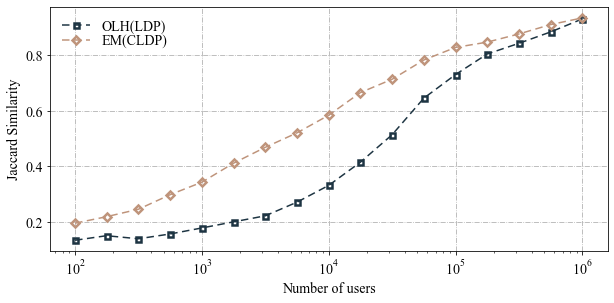

In [2]:
a = [0.1130045471918537, 0.11159875676978444, 0.12153773851916265, 0.11882383226885375, 0.11507813988464141, 0.11241643254876055, 0.13183094334797119, 0.14684709146933256, 0.14462620810293833, 0.16572739899237868, 0.17928899694177247, 0.20687339943506922, 0.23957430812236805]
b = [0.19358456488809442, 0.21747105040093978, 0.25831562298257316, 0.29337977991580033, 0.35711076078736226, 0.41678873321011933, 0.4654483873175898, 0.5229843044946542, 0.5797081389375244, 0.6537677149881048, 0.7110522360087578, 0.7540182426269384, 0.8216389986824769]
a = [0.13475880024641634, 0.1511469161012255, 0.1401059771972585, 0.15736339614123493, 0.1790226032994916, 0.20092011561298898, 0.22261651181120523, 0.27166929253021643, 0.3318891773853169, 0.4153036711979982, 0.5140019606136548, 0.6453227094966225, 0.7302021456804065, 0.8041652550348201, 0.8425465838509314, 0.8834293242988894, 0.9302051571616786]
b = [0.1961116429644326, 0.21944074082344325, 0.24627634088125105, 0.29855134421269997, 0.34346893568748066, 0.4117745613504954, 0.46879369387774866, 0.520770273759779, 0.5841321118772393, 0.6654976810628984, 0.713346312302834, 0.7825394315829098, 0.8277376246941464, 0.8468078298513081, 0.8761754187841143, 0.9098588368153584, 0.9339393939393937]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4.5))
plt.rc('font',family='Times New Roman', size=14)
# fig, ax = plt.subplots(figsize=(8, 4))
x = [   100,    177,    316,    562,   1000,   1778,   3162,   5623,  10000,  17782,  31622,  56234, 100000, 177827,  316227,  562341, 1000000]
plt.plot(x, a, 's--', markersize=5, dashes=[5, 3], markerfacecolor='none', markeredgewidth=2.5, label='OLH(LDP)', color=(29/255, 52/255, 66/255))
plt.plot(x, b, 'D-',  markersize=5, dashes=[5, 3], markerfacecolor='none', markeredgewidth=2.5, label='EM(CLDP)' , color=(191/255, 148/255, 123/255))
# plt.xticks(x)
plt.xscale('log')
plt.xlabel('Number of users')
plt.ylabel('Jaccard Similarity')
plt.legend(loc=0, columnspacing=0, labelspacing=0, frameon=False, fancybox=False, framealpha=0.5)
plt.grid(linestyle='-.')
plt.savefig('user_num.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

In [429]:
np.concatenate((np.logspace(2, 3, 5), np.logspace(3, 4, 5), np.logspace(4, 5, 5))).astype(int)

array([   100,    177,    316,    562,   1000,   1000,   1778,   3162,
         5623,  10000,  10000,  17782,  31622,  56234, 100000])

In [431]:
np.logspace(5, 6, 5).astype(int)

array([ 100000,  177827,  316227,  562341, 1000000])